In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no missing values.There is no need to pre-process the data for missing values. But,some features might have zeros which are not valid values (BMI, Blood Pressure,Skin thickness,Insulin,Age). Replace zeros with NaN and then impute(replace missing values with some meaningful data like mean of that particular column).

In [8]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [11]:
# count the number of occurrences of each unique value in the "Pregnancies" column
df.Pregnancies.value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


Data Visualisation

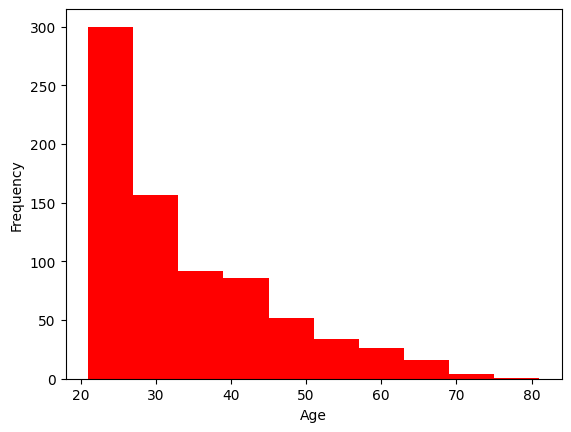

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
df.Age.plot(color="red",kind="hist")
plt.xlabel("Age")
plt.show()

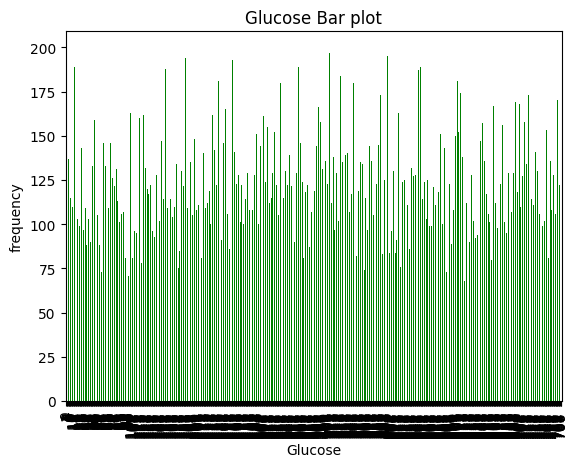

In [13]:
df.Glucose.plot(color="green",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

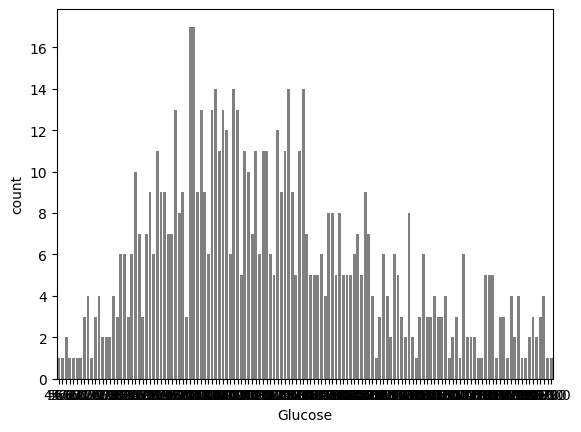

In [14]:
sns.countplot(data=df,x="Glucose",color="grey")
plt.show()

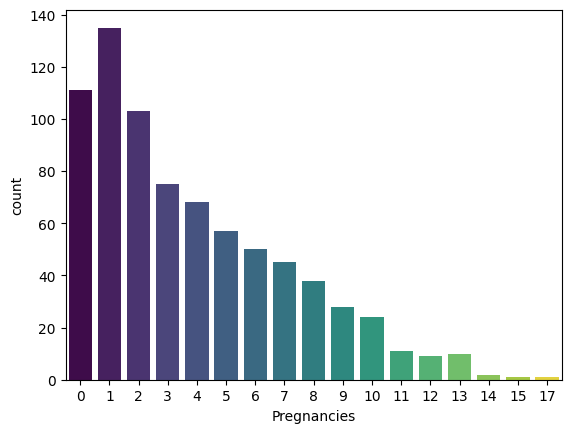

In [16]:
sns.countplot(data=df, x="Pregnancies", hue="Pregnancies", palette="viridis", legend=False)
plt.show()

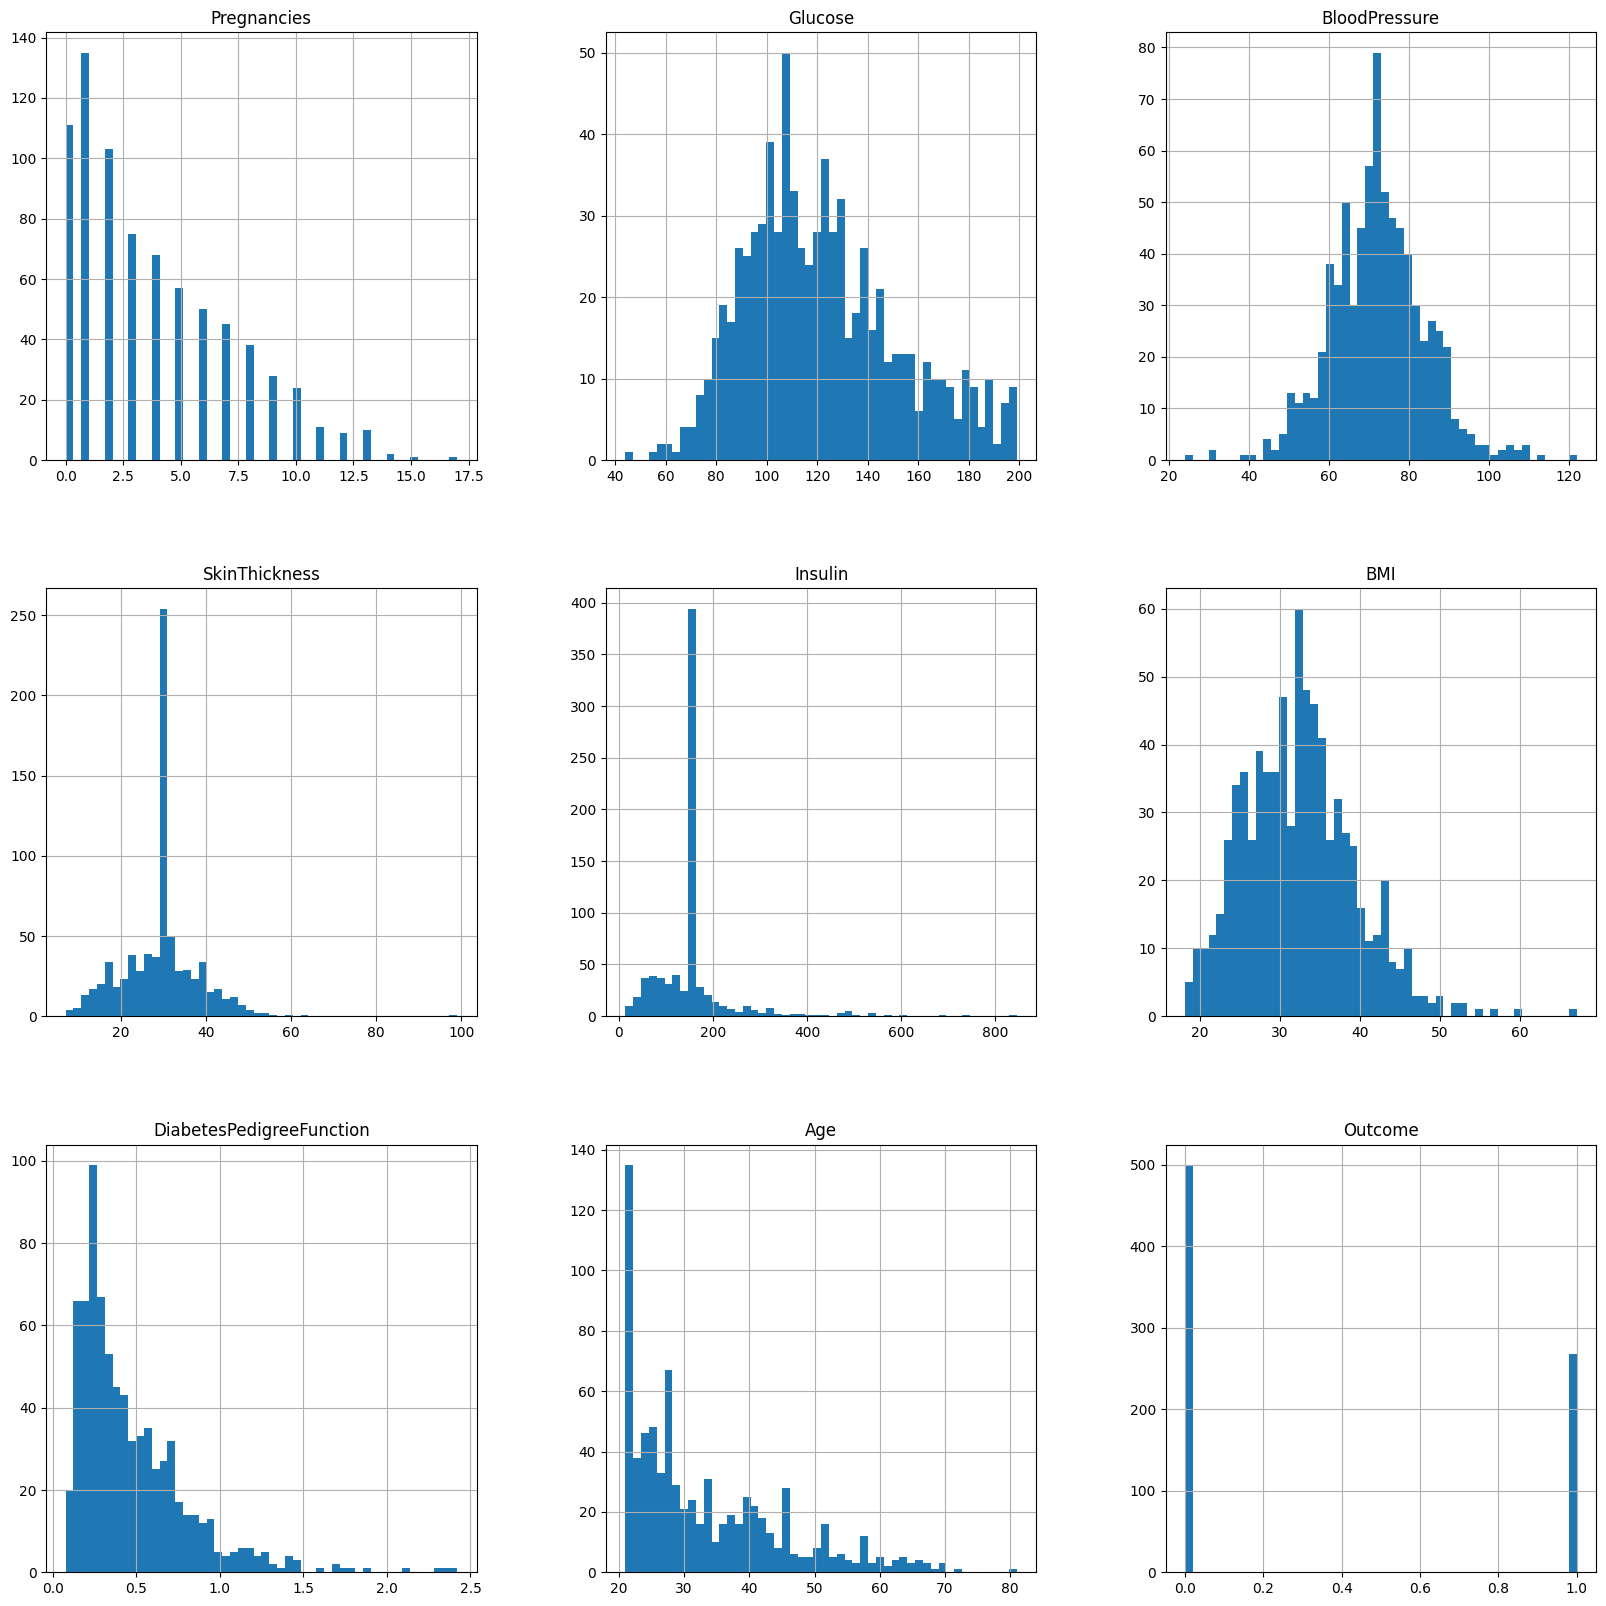

In [17]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [18]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending = False)

,Outcome
Outcome,1.000000
Glucose,0.492928
BMI,0.311924
Age,0.238356
Pregnancies,0.221898
SkinThickness,0.215299
Insulin,0.214411
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


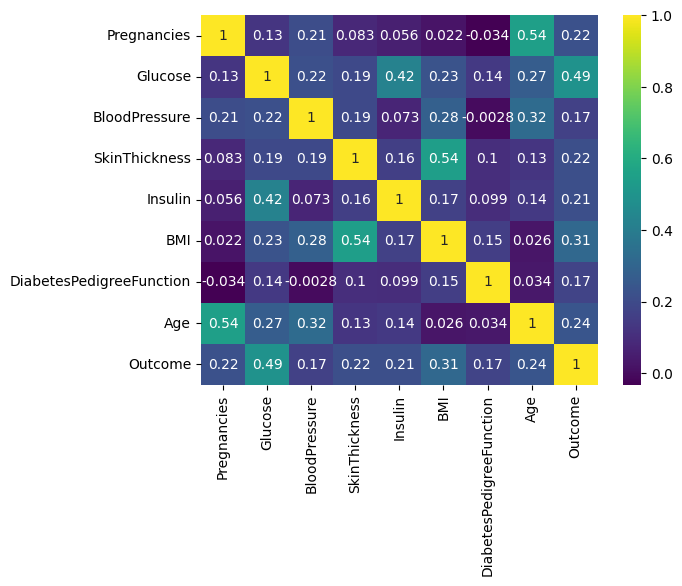

In [19]:
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

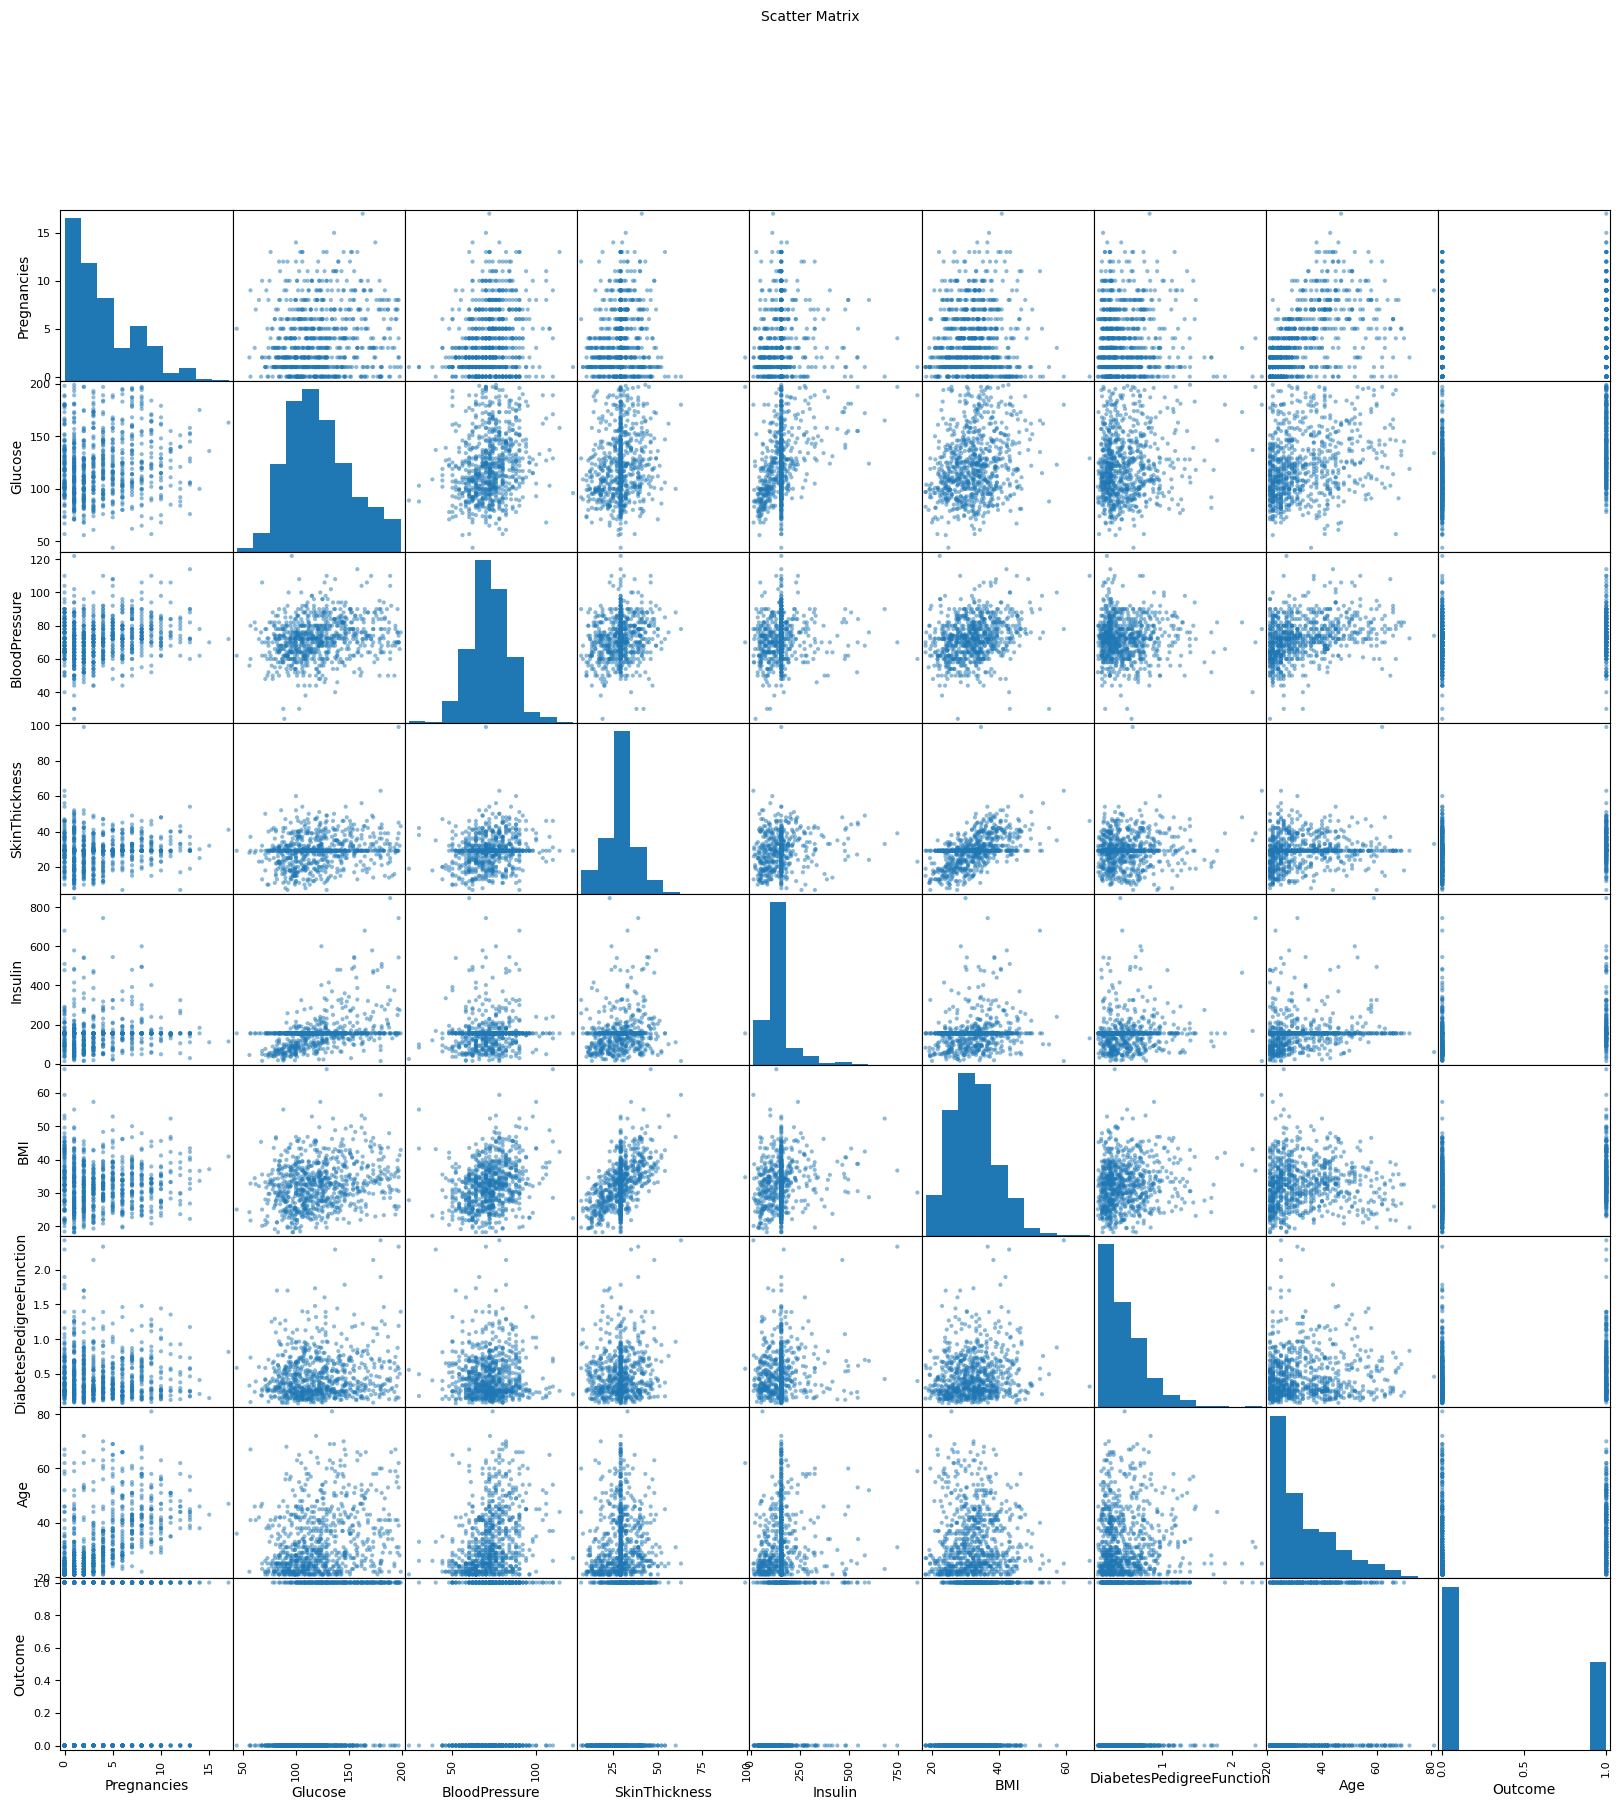

In [20]:
from pandas.plotting import scatter_matrix
def plotScatterMatrix(df, plot_size, font_size):
    scatter_matrix(df, figsize=(plot_size, plot_size))
    plt.suptitle('Scatter Matrix', size=font_size)
    plt.show()
plotScatterMatrix(df,20,10)

In [21]:
# splitting the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale the features to maintain integrity of model's performance evaluation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.7532467532467533


In [28]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Decision Tree Accuracy: 0.7142857142857143


In [30]:
# k-Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred)}')

KNN Accuracy: 0.7467532467532467


In [31]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred)}')

SVM Accuracy: 0.7532467532467533


In [32]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred)}')

Random Forest Accuracy: 0.7662337662337663


Model Evaluation

In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 18]
 [18 37]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [42]:
final_model = RandomForestClassifier(**grid_search.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(f'Final Model Accuracy: {accuracy_score(y_test, y_pred)}')

Final Model Accuracy: 0.7532467532467533


In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80 19]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [44]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10)
rf = RandomForestClassifier()
cv_results = cross_val_score(rf, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_results.mean()} ± {cv_results.std()}")

Cross-Validation Accuracy: 0.7687731359069276 ± 0.04287726121470497


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=skf, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)
print(f'Best Parameters: {random_search.best_params_}')

# Train the final model with the best parameters
final_model = RandomForestClassifier(**random_search.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Evaluate the final model
print(f'Final Model Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
310 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
310 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Final Model Accuracy: 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [46]:
# Feature Selection
# Feature Importance
importances = final_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

# Select the most important features
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X_train_selected = X_train[:, selected_features.index]
X_test_selected = X_test[:, selected_features.index]

# Train the final model with selected features
final_model.fit(X_train_selected, y_train)
y_pred_selected = final_model.predict(X_test_selected)

# Evaluate the final model with selected features
print(f'Final Model with Selected Features Accuracy: {accuracy_score(y_test, y_pred_selected)}')
print(confusion_matrix(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))


                    Feature  Importance
1                   Glucose    0.279066
5                       BMI    0.158349
7                       Age    0.150299
6  DiabetesPedigreeFunction    0.115598
4                   Insulin    0.090095
2             BloodPressure    0.071365
3             SkinThickness    0.070344
0               Pregnancies    0.064884
Final Model with Selected Features Accuracy: 0.7597402597402597
[[79 20]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [48]:
# Ensemble methods
from sklearn.ensemble import VotingClassifier

# Create base models
base_models = [
    ('log_reg', LogisticRegression()),
    ('tree', DecisionTreeClassifier()),
    ('forest', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True))
]

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=base_models, voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print(f'Ensemble Model Accuracy: {accuracy_score(y_test, y_pred_ensemble)}')
print(confusion_matrix(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


Ensemble Model Accuracy: 0.7467532467532467
[[79 20]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [49]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# ROC-AUC
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc}')

ROC-AUC: 0.7790633608815427
Precision-Recall AUC: 0.6835041999028044
